In [1]:
import numpy as np
import pandas as pd

# For visualizations
import seaborn as sns 
sns.set_style('whitegrid')

# To plot the graphs
import matplotlib as mpl 
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Inspired by previous data analysis done by Rihad Variawa

/kaggle/input/international-energy-statistics/Energy-Questionnaire-Guidelines.pdf
/kaggle/input/international-energy-statistics/all_energy_statistics.csv


In [2]:
# Read data into dataframe
df = pd.read_csv("/kaggle/input/international-energy-statistics/all_energy_statistics.csv")

In [3]:
# Inspect data
df.info()
# print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1189482 entries, 0 to 1189481
Data columns (total 7 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   country_or_area        1189482 non-null  object 
 1   commodity_transaction  1189482 non-null  object 
 2   year                   1189482 non-null  int64  
 3   unit                   1189482 non-null  object 
 4   quantity               1189482 non-null  float64
 5   quantity_footnotes     163946 non-null   float64
 6   category               1189482 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 63.5+ MB


In [4]:
# Drop unused variable (footnotes)
df.drop("quantity_footnotes", axis=1, inplace=True)

In [5]:
# Create country lists
non_EU = ["US", "BR", "CAN", "CHI", "IND", "JAP", "UK"]
EU = ["SP", "ITA", "GER", "FR", "NETH"]
country_dict = {"US": "United States", "BR": "Brazil", "CAN": "Canada", "CHI": "China", "IND": "India", "JAP": "Japan", "UK": "United Kingdom","SP": "Spain", "ITA": "Italy", "GER": "Germany", "FR": "France", "NETH": "Netherlands"}

In [6]:
# Make DataFrame for Countries of Interest
byCountry = {}
for country in non_EU:
    byCountry[country] = df[df.country_or_area.isin([country_dict[country]])].sort_values("year")
for country in EU:
    byCountry[country] = df[df.country_or_area.isin([country_dict[country]])].sort_values("year")

In [7]:
# Get electricity totals for Germany in 2014
#GER_2014_totals = GER_2014[GER_2014.category=="total_electricity"]
#GER_2014_totals.info()
#GER_2014_totals.to_excel('GER_2014_totals.xlsx')

In [8]:
# Dataframes by energy type, by country

# Wind DataFrames
Wind = {}
for country in non_EU:
    Wind[country] = byCountry[country][byCountry[country].commodity_transaction == "Electricity - total wind production"].sort_values("year") 
for country in EU:
    Wind[country] = byCountry[country][byCountry[country].commodity_transaction == "Electricity - total wind production"].sort_values("year") 

# Solar DataFrames
Solar = {}
for country in non_EU:
    Solar[country] = byCountry[country][byCountry[country].commodity_transaction == "Electricity - total solar production"].sort_values("year") 
for country in EU:
    Solar[country] = byCountry[country][byCountry[country].commodity_transaction == "Electricity - total solar production"].sort_values("year") 

# Hydro DataFrames
Hydro = {}
for country in non_EU:
    Hydro[country] = byCountry[country][byCountry[country].commodity_transaction == "Hydro – Main activity"].sort_values("year") 
for country in EU:
    Hydro[country] = byCountry[country][byCountry[country].commodity_transaction == "Hydro – Main activity"].sort_values("year") 

# Nuclear DataFrames
Nuclear = {}
for country in non_EU:
    Nuclear[country] = byCountry[country][byCountry[country].commodity_transaction == "Electricity - total nuclear production"].sort_values("year") 
for country in EU:
    Nuclear[country] = byCountry[country][byCountry[country].commodity_transaction == "Electricity - total nuclear production"].sort_values("year") 

# Total Electricity Production DataFrames
totalProduction = {}
for country in non_EU:
    totalProduction[country] = byCountry[country][byCountry[country].commodity_transaction == "Electricity - total production, main activity"].sort_values("year") 
for country in EU:
    totalProduction[country] = byCountry[country][byCountry[country].commodity_transaction == "Electricity - total production, main activity"].sort_values("year") 

# Total Electricity Consumption DataFrames
totalConsumption = {}
for country in non_EU:
    totalConsumption[country] = byCountry[country][byCountry[country].commodity_transaction == "Electricity - Final energy consumption"].sort_values("year") 
for country in EU:
    totalConsumption[country] = byCountry[country][byCountry[country].commodity_transaction == "Electricity - Final energy consumption"].sort_values("year") 



In [9]:
# Joining DataFrames

Renewable = {}

# Merge totalProduction and totalConsumption
for country in non_EU:
    Renewable[country] = pd.merge(totalProduction[country], totalConsumption[country][["year", "quantity"]], how="outer", on=["year"], suffixes=('_totalProduction', '_totalConsumption'))
    #Renewable[country].rename(columns = {'quantity':'quantity_totalConsumption'}, inplace=True)
    Renewable[country].drop(["commodity_transaction", "category"], axis=1, inplace=True)
for country in EU:
    Renewable[country] = pd.merge(totalProduction[country], totalConsumption[country][["year", "quantity"]], how="outer", on=["year"], suffixes=('_totalProduction', '_totalConsumption'))
    #Renewable[country].rename(columns = {'quantity':'quantity_totalConsumption'}, inplace=True)
    Renewable[country].drop(["commodity_transaction", "category"], axis=1, inplace=True)

# Merge Totals with Wind
for country in non_EU:
    Renewable[country] = pd.merge(Renewable[country], Wind[country][["year", "quantity"]], how="outer", on=["year"])
    #Renewable[country].drop(["commodity_transaction", "category"], axis=1, inplace=True)
for country in EU:
    Renewable[country] = pd.merge(Renewable[country], Wind[country][["year", "quantity"]], how="outer", on=["year"])
    #Renewable[country].drop(["commodity_transaction", "category"], axis=1, inplace=True)
    
# Merge Totals with Wind and Solar
for country in non_EU:
    Renewable[country] = pd.merge(Renewable[country], Solar[country][["year", "quantity"]], how="outer", on=["year"], suffixes=('_wind', '_solar'))
    #Renewable[country].drop(["commodity_transaction", "category"], axis=1, inplace=True)
for country in EU:
    Renewable[country] = pd.merge(Renewable[country], Solar[country][["year", "quantity"]], how="outer", on=["year"], suffixes=('_wind', '_solar'))
    #Renewable[country].drop(["commodity_transaction", "category"], axis=1, inplace=True)

# Merge Totals with Wind and Solar and Nuclear
for country in non_EU:
    Renewable[country] = pd.merge(Renewable[country], Nuclear[country][["year", "quantity"]], how="outer", on=["year"])
for country in EU:
    Renewable[country] = pd.merge(Renewable[country], Nuclear[country][["year", "quantity"]], how="outer", on=["year"])

# Merge Totals with Wind and Solar and Nuclear and Hydro
for country in non_EU:
    Renewable[country] = pd.merge(Renewable[country], Hydro[country][["year", "quantity"]], how="outer", on=["year"], suffixes=("_nuclear", "_hydro"))
for country in EU:
    Renewable[country] = pd.merge(Renewable[country], Hydro[country][["year", "quantity"]], how="outer", on=["year"], suffixes=("_nuclear", "_hydro"))

Renewable["GER"].tail()


,country_or_area,year,unit,quantity_totalProduction,quantity_totalConsumption,quantity_wind,quantity_solar,quantity_nuclear,quantity_hydro
19,Germany,2010,"Kilowatt-hours, million",580009.0,532424.0,37793.0,11729.0,140556.0,26975.0
20,Germany,2011,"Kilowatt-hours, million",562454.0,525546.0,48883.0,19599.0,107971.0,23184.0
21,Germany,2012,"Kilowatt-hours, million",585718.0,525834.0,50670.0,26380.0,99460.0,27499.0
22,Germany,2013,"Kilowatt-hours, million",593837.0,523201.0,51708.0,31010.0,97290.0,28600.0
23,Germany,2014,"Kilowatt-hours, million",582345.0,512835.0,57357.0,36056.0,97129.0,25282.0


In [10]:
# Make Master Dataframe

# Make dataframe to append to
Master = Renewable["GER"]
# Clear dataframe (Germany values will be appended again soon)
Master = Master.iloc[0:0]

# Append all relevant countries
for country in non_EU:
    Master = Master.append(Renewable[country], ignore_index=True)
for country in EU:
    Master = Master.append(Renewable[country], ignore_index=True)

Master.to_excel('Selected_Countries.xlsx')
Master.tail()
    

,country_or_area,year,unit,quantity_totalProduction,quantity_totalConsumption,quantity_wind,quantity_solar,quantity_nuclear,quantity_hydro
294,Netherlands,2010,"Kilowatt-hours, million",95187.0,108000.0,3994.0,56.0,3969.0,105.0
295,Netherlands,2011,"Kilowatt-hours, million",89215.0,108148.0,5101.0,104.0,4141.0,57.0
296,Netherlands,2012,"Kilowatt-hours, million",78150.0,104006.0,4981.0,226.0,3915.0,104.0
297,Netherlands,2013,"Kilowatt-hours, million",77128.0,104373.0,5627.0,487.0,2891.0,114.0
298,Netherlands,2014,"Kilowatt-hours, million",81458.0,101630.0,5797.0,785.0,4091.0,112.0


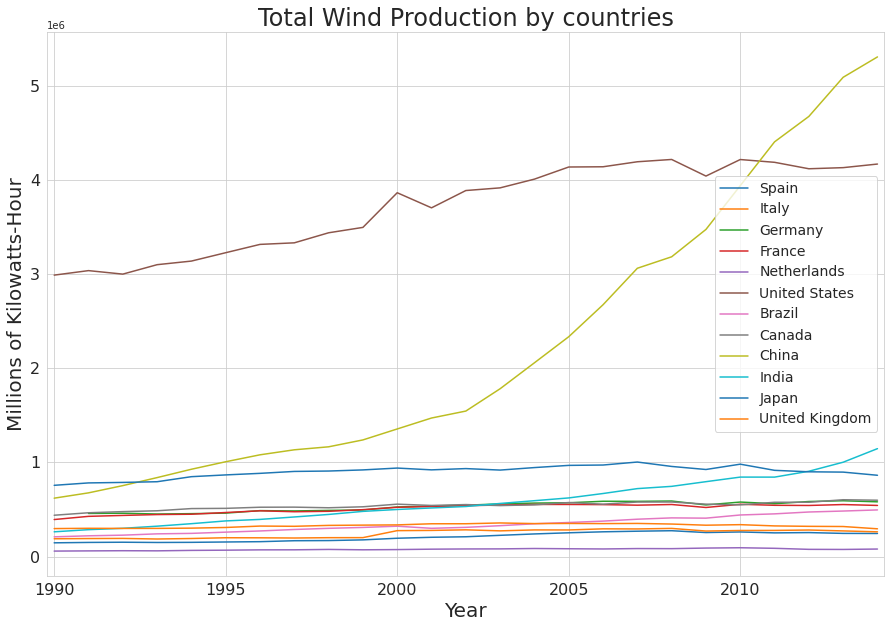

In [11]:
# Get overview Total Energy Production

# Figure details
plt.figure(figsize=(15,10))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16) 

plt.ylabel("Millions of Kilowatts-Hour",fontsize=20) 
plt.xlabel('Year',fontsize=20)
plt.title('Total Wind Production by countries',fontsize=24) 
plt.xlim(1989.8, 2014.2)

# Add individual countries to plot
for country in EU:
    plt.plot(totalProduction[country]["year"],totalProduction[country]["quantity"],label=country_dict[country]) 
for country in non_EU:
    plt.plot(totalProduction[country]["year"],totalProduction[country]["quantity"],label=country_dict[country])

# Show Plot
plt.legend(fontsize=14)
plt.show()

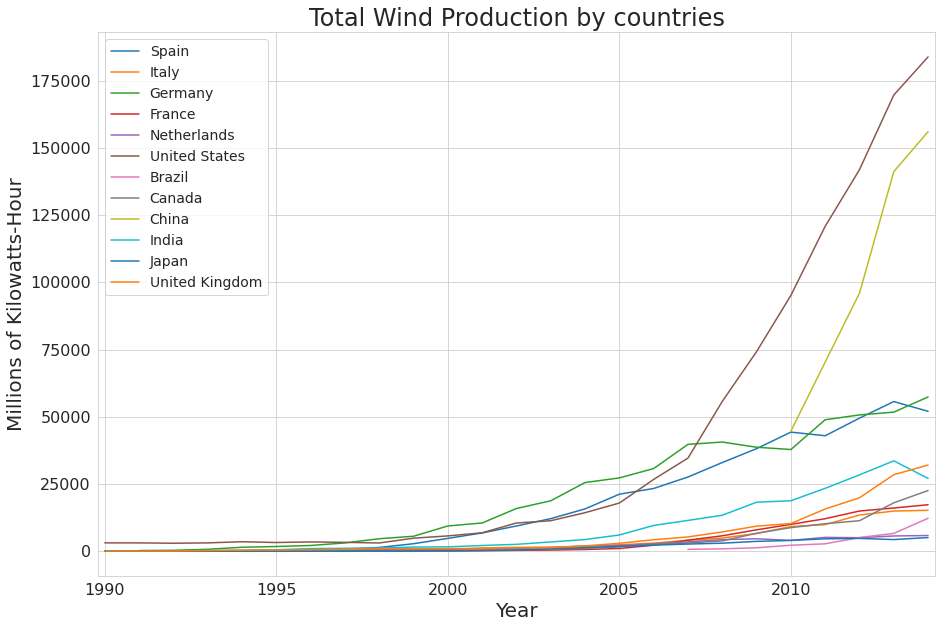

In [12]:
# Get overview of Wind Production in the EU

# Figure details
plt.figure(figsize=(15,10))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16) 

plt.ylabel("Millions of Kilowatts-Hour",fontsize=20) 
plt.xlabel('Year',fontsize=20)
plt.title('Total Wind Production by countries',fontsize=24) 
plt.xlim(1989.8, 2014.2)

# Add individual countries to plot
for country in EU:
    plt.plot(Wind[country]["year"],Wind[country]["quantity"],label=country_dict[country]) 
for country in non_EU:
    plt.plot(Wind[country]["year"],Wind[country]["quantity"],label=country_dict[country])

# Show Plot
plt.legend(fontsize=14)
plt.show()

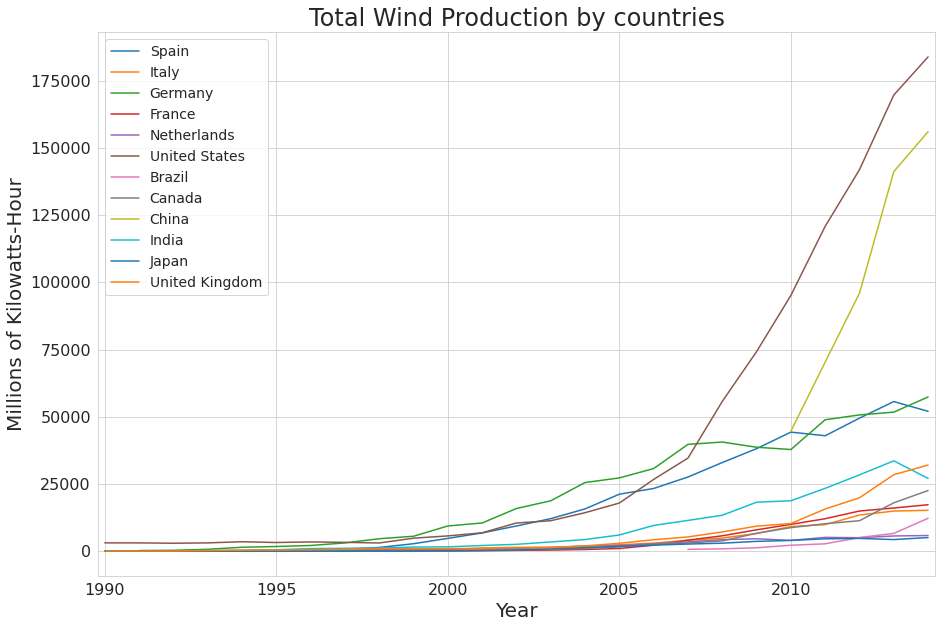

In [13]:
# Get overview of Wind Production in the EU

# Figure details
plt.figure(figsize=(15,10))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16) 

plt.ylabel("Millions of Kilowatts-Hour",fontsize=20) 
plt.xlabel('Year',fontsize=20)
plt.title('Total Wind Production by countries',fontsize=24) 
plt.xlim(1989.8, 2014.2)

# Add individual countries to plot
for country in EU:
    plt.plot(Wind[country]["year"],Wind[country]["quantity"],label=country_dict[country]) 
for country in non_EU:
    plt.plot(Wind[country]["year"],Wind[country]["quantity"],label=country_dict[country])

# Show Plot
plt.legend(fontsize=14)
plt.show()

NameError: name 'US_Wind' is not defined

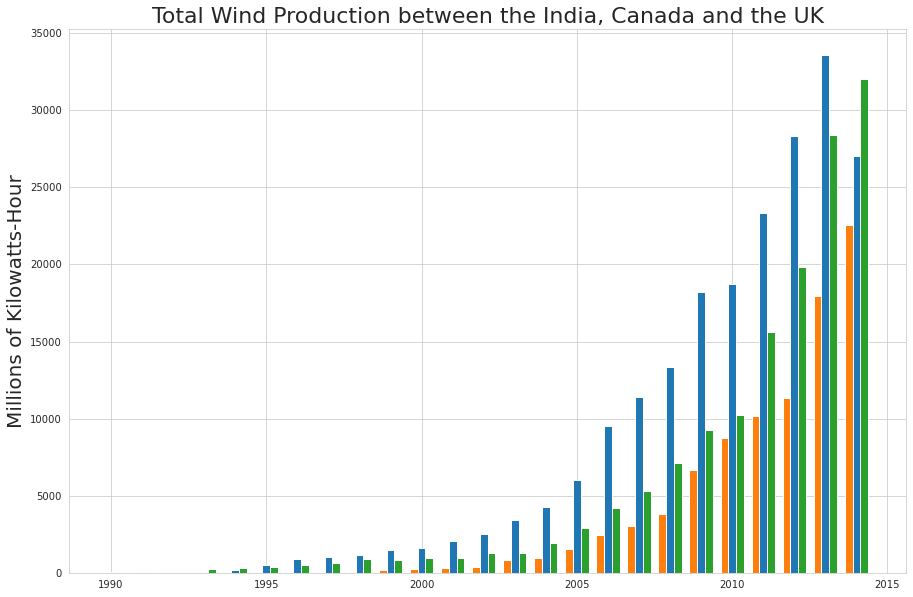

In [14]:
# Total Wind production btw India Canada & UK -- rectangle plot

# Plot Setup
width = 0.25
fig, ax = plt.subplots(figsize=(15,10))

# Add countries
rects1 = ax.bar(Wind["IND"]["year"], Wind["IND"]["quantity"], width) 
rects2 = ax.bar(Wind["CAN"]["year"] + width -.5, Wind["CAN"]["quantity"], width) 
rects3 = ax.bar(Wind["UK"]["year"] + width, Wind["UK"]["quantity"], width)

# Complete Plot
ax.set_ylabel("Millions of Kilowatts-Hour", fontsize=20)
ax.set_title("Total Wind Production between the India, Canada and the UK",fontsize=22) 
ax.set_xticks(US_Wind["year"])
ax.set_xticklabels(US_Wind["year"], rotation=45)
ax.legend((rects1[0], rects2[0],rects3[0]), ('India Wind Production', 'Canada Wind Production', 'UK Wind Production' ), fontsize=14)

# Show plot
plt.show()

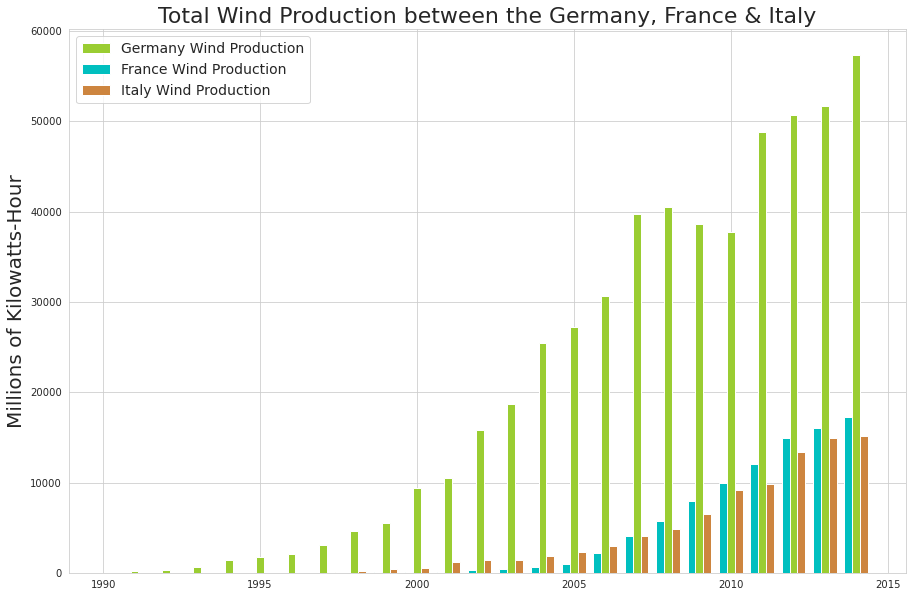

In [15]:
# Clean Energy Production in the EU

# Plot Setup
width = 0.25
fig, ax = plt.subplots(figsize=(15,10))

# Add countries
rects1 = ax.bar(Wind["GER"]["year"], Wind["GER"]["quantity"], width, color='yellowgreen') 
rects2 = ax.bar(Wind["FR"]["year"] + width -.5, Wind["FR"]["quantity"], width, color='c') 
rects3 = ax.bar(Wind["ITA"]["year"] + width, Wind["ITA"]["quantity"], width, color='peru')

# Complete Plot
ax.set_ylabel("Millions of Kilowatts-Hour", fontsize=20)
ax.set_title("Total Wind Production between the Germany, France & Italy",fontsize=22) 
#ax.set_xticks(US_Wind["year"])
#ax.set_xticklabels(US_Wind["year"], rotation=45)
ax.legend((rects1[0], rects2[0],rects3[0]), ('Germany Wind Production', 'France Wind Production', 'Italy Wind Production' ), fontsize=14)

# Show plot
plt.show()

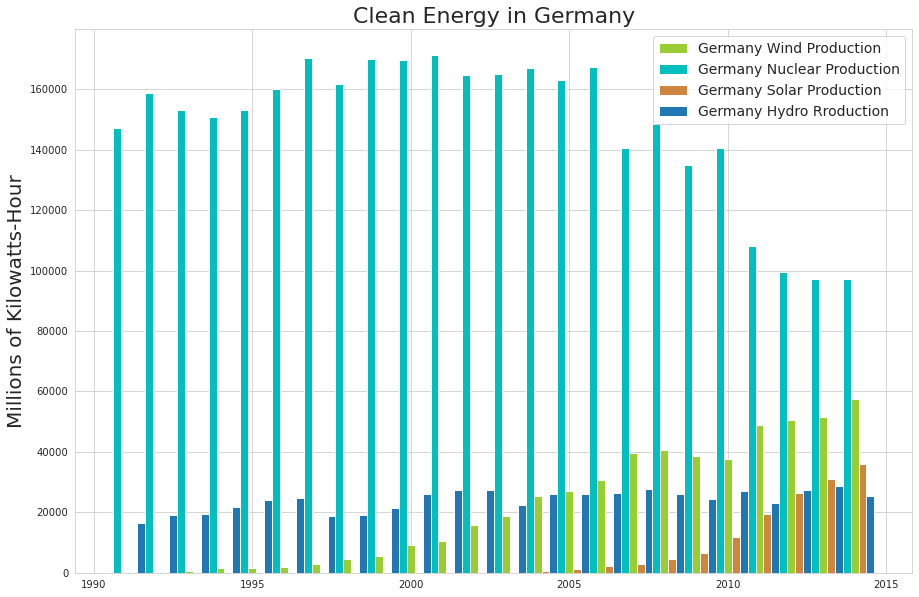

In [16]:
# Clean Energy Production in Germany

# Plot Setup
width = 0.25
fig, ax = plt.subplots(figsize=(15,10))

# Add countries
rects1 = ax.bar(Wind["GER"]["year"], Wind["GER"]["quantity"], width, color='yellowgreen') 
rects2 = ax.bar(Nuclear["GER"]["year"] + width -.5, Nuclear["GER"]["quantity"], width, color='c') 
rects3 = ax.bar(Solar["GER"]["year"] + width, Solar["GER"]["quantity"], width, color='peru')
rects4 = ax.bar(Hydro["GER"]["year"] + width+.25, Hydro["GER"]["quantity"], width)

# Complete Plot
ax.set_ylabel("Millions of Kilowatts-Hour", fontsize=20)
ax.set_title("Clean Energy in Germany",fontsize=22) 
#ax.set_xticks(US_Wind["year"])
#ax.set_xticklabels(US_Wind["year"], rotation=45)
#ax.legend((rects1[0], rects2[0],rects3[0], rects4[0]), ('Germany Wind Production', 'Germany Nuclear Production', 'Germany Solar Production', 'Germany Total Energy'), fontsize=14)
ax.legend((rects1[0], rects2[0],rects3[0], rects4[0]), ('Germany Wind Production', 'Germany Nuclear Production', 'Germany Solar Production', "Germany Hydro Rroduction"), fontsize=14)

# Show plot
plt.show()

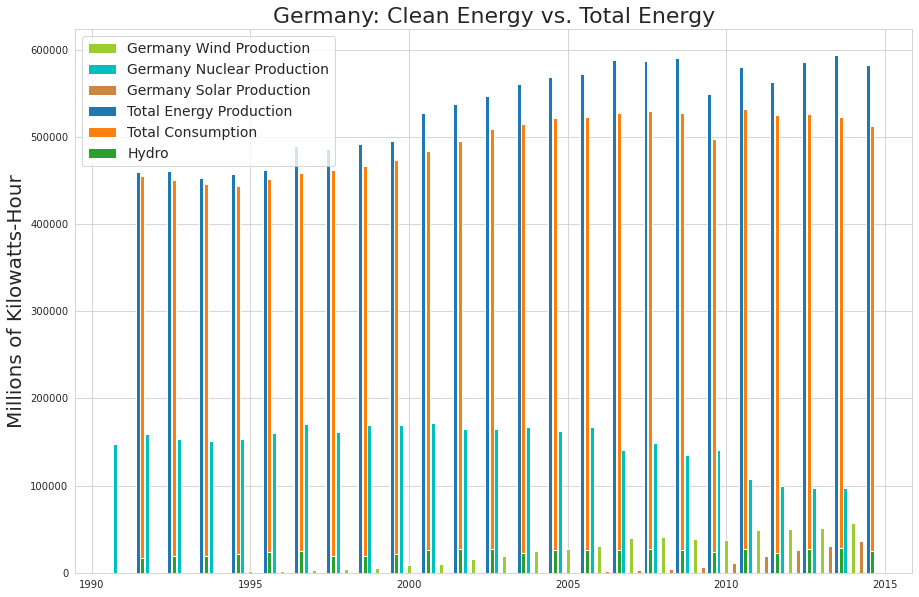

In [17]:
# Clean Energy Production in Germany

# Plot Setup
width = 0.25
fig, ax = plt.subplots(figsize=(15,10))

# Add countries
rects1 = ax.bar(Wind["GER"]["year"], Wind["GER"]["quantity"], width/2, color='yellowgreen') 
rects2 = ax.bar(Nuclear["GER"]["year"] + width -.5, Nuclear["GER"]["quantity"], width/2, color='c') 
rects3 = ax.bar(Solar["GER"]["year"] + width, Solar["GER"]["quantity"], width/2, color='peru')
rects4 = ax.bar(totalProduction["GER"]["year"] + width +.2, totalProduction["GER"]["quantity"], width/2)
rects5 = ax.bar(totalConsumption["GER"]["year"] + width +.35, totalConsumption["GER"]["quantity"], width/2)
rects6 = ax.bar(Hydro["GER"]["year"] + width +.35, Hydro["GER"]["quantity"], width/2)

# Complete Plot
ax.set_ylabel("Millions of Kilowatts-Hour", fontsize=20)
ax.set_title("Germany: Clean Energy vs. Total Energy",fontsize=22) 
#ax.set_xticks(US_Wind["year"])
#ax.set_xticklabels(US_Wind["year"], rotation=45)
ax.legend((rects1[0], rects2[0],rects3[0], rects4[0], rects5[0], rects6[0]), ('Germany Wind Production', 'Germany Nuclear Production', 'Germany Solar Production', 'Total Energy Production', "Total Consumption", "Hydro"), fontsize=14)

# Show plot
plt.show()

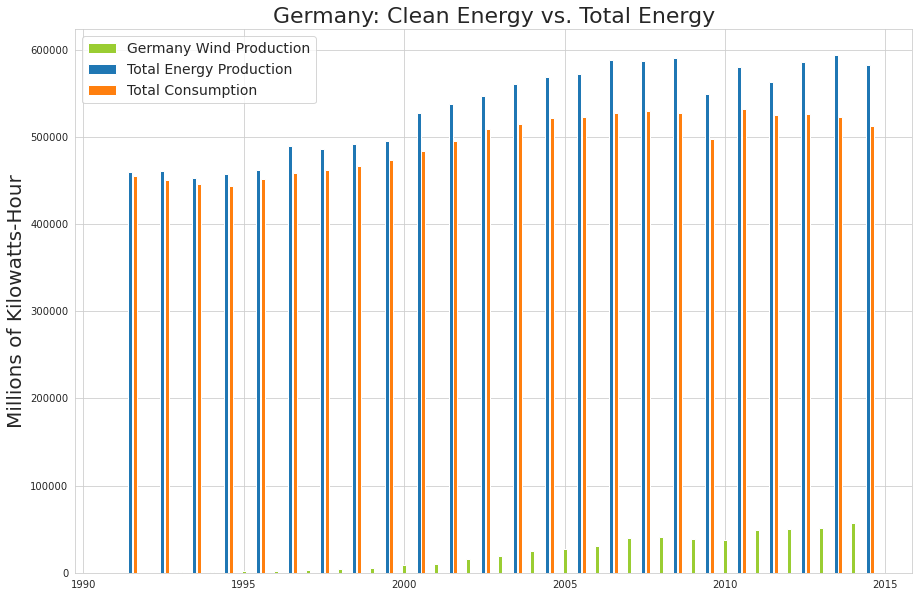

In [18]:
# Clean Energy Production in Germany

# Plot Setup
width = 0.25
fig, ax = plt.subplots(figsize=(15,10))

# Add countries
rects1 = ax.bar(Wind["GER"]["year"], Wind["GER"]["quantity"], width/2, color='yellowgreen') 
#rects2 = ax.bar(Nuclear["GER"]["year"] + width -.5, Nuclear["GER"]["quantity"], width/2, color='c') 
#rects3 = ax.bar(Solar["GER"]["year"] + width, Solar["GER"]["quantity"], width/2, color='peru')
#rects6 = ax.bar(Hydro["GER"]["year"] + width +.35, Hydro["GER"]["quantity"], width/2)
rects4 = ax.bar(totalProduction["GER"]["year"] + width +.2, totalProduction["GER"]["quantity"], width/2)
rects5 = ax.bar(totalConsumption["GER"]["year"] + width +.35, totalConsumption["GER"]["quantity"], width/2)

# Complete Plot
ax.set_ylabel("Millions of Kilowatts-Hour", fontsize=20)
ax.set_title("Germany: Clean Energy vs. Total Energy",fontsize=22) 
#ax.set_xticks(US_Wind["year"])
#ax.set_xticklabels(US_Wind["year"], rotation=45)
ax.legend((rects1[0], rects4[0], rects5[0]), ('Germany Wind Production',  'Total Energy Production', "Total Consumption"), fontsize=14)

# Show plot
plt.show()